<a href="https://colab.research.google.com/github/RoiLe/AI-picture-recognition/blob/Roi-dev/demo_AI_img_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science final project - [proposal]
#### by Lior Guetta & Roi Levi

## Problem description

// The description will be here

idea - show how many frauds happends around the world by nice visualizations, and also bring some stories about the ease of creating images 
and especially fake images. 

#### requirements

In [48]:
# pip install opendatasets
# pip install pandas

#### imports

In [1]:
import opendatasets as od
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import numpy as np


## Data Collection

#### kaggle DS
##### 120K of FAKE&REAL images

In [3]:
od.download("https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading cifake-real-and-ai-generated-synthetic-images.zip to .\cifake-real-and-ai-generated-synthetic-images


100%|██████████| 105M/105M [00:12<00:00, 9.09MB/s] 


#### Splitting
   train: 80K images, 
   val:   20k images, 
   test:  20k images

In [20]:


# Set paths
input_folder = "cifake-real-and-ai-generated-synthetic-images"
output_folder = "NEW-cifake-real-and-ai-generated-synthetic-images"

train_ratio = 0.8
validation_ratio = 0.2

# List classes
classes = ["FAKE", "REAL"]

# Create folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, folder, "FAKE"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, folder, "REAL"), exist_ok=True)

# Loop through classes and split
for class_name in classes:
    class_folder = os.path.join(input_folder, "train", class_name)
    files = os.listdir(class_folder)
    random.shuffle(files)

    train_count = int(train_ratio * len(files))
    val_count = int(validation_ratio * len(files))

    train_files = files[:train_count]
    val_files = files[train_count:train_count + val_count]
    test_files = files[train_count + val_count:]

    for file in train_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "train", class_name, file)
        shutil.copy(src, dest)

    for file in val_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "val", class_name, file)
        shutil.copy(src, dest)

    for file in test_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "test", class_name, file)
        shutil.copy(src, dest)


# preprocessing

### show some data

In [9]:
# reading the XLSX file
fake_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\train\FAKE')

images_path = []
for filename in os.listdir(fake_folder):
  img = os.path.join(fake_folder,filename)
  if img is not None:
      images_path.append(img)


some random FAKE images


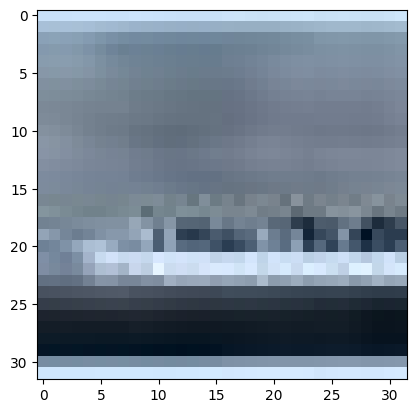

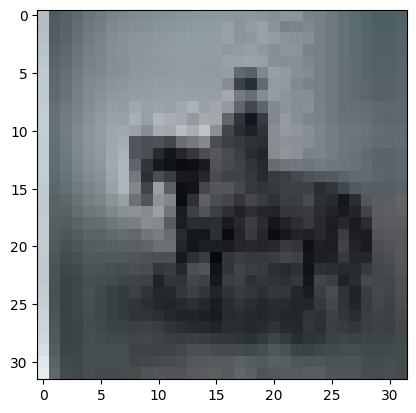

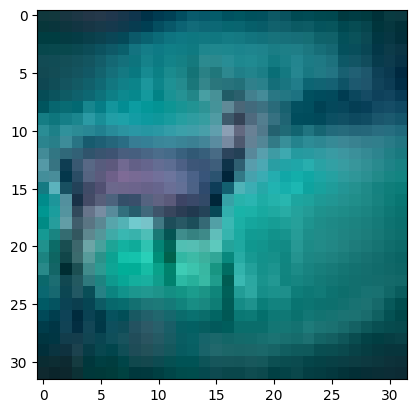

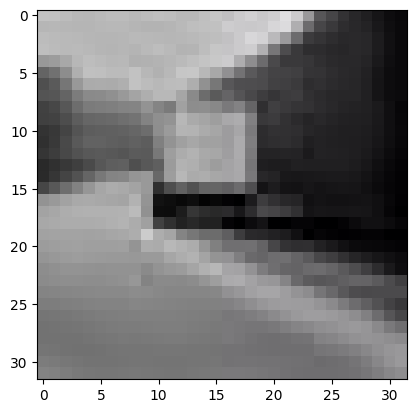

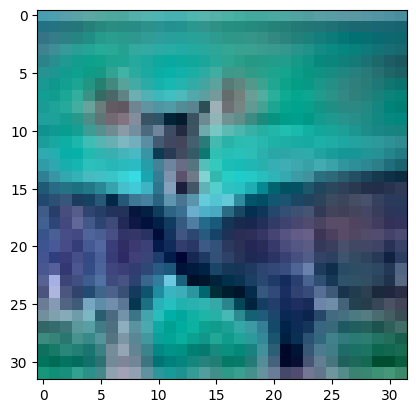

In [10]:
print("some random FAKE images")

for i in range(5):
    j = random.randint(0, 39999)
    image = cv2.imread(images_path[j])
    image_name = "img"

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[j]}")



# model


### starts build the CNN

In [11]:
train_datagen = ImageDataGenerator(
                                    width_shift_range = 0.3,
                                    height_shift_range = 0.3,
                                    brightness_range = (0.2, 1.4),
                                    rotation_range = 20,
                                    rescale = 1./255,
                                    zoom_range = [0.5, 1.5],
                                    channel_shift_range=150.0,
                                    horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('NEW-cifake-real-and-ai-generated-synthetic-images\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 80000 images belonging to 2 classes.


In [13]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('NEW-cifake-real-and-ai-generated-synthetic-images\\val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [14]:
cnn = tf.keras.models.Sequential()

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [16]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [18]:
cnn.add(tf.keras.layers.Flatten())

In [19]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

In [21]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
2500/2500 [==============================] - 399s 160ms/step - loss: 0.5988 - accuracy: 0.6761 - val_loss: 0.4244 - val_accuracy: 0.8132
Epoch 2/10
2500/2500 [==============================] - 392s 157ms/step - loss: 0.5555 - accuracy: 0.7152 - val_loss: 0.4075 - val_accuracy: 0.8202
Epoch 3/10
2500/2500 [==============================] - 333s 133ms/step - loss: 0.5286 - accuracy: 0.7357 - val_loss: 0.4154 - val_accuracy: 0.8027
Epoch 4/10
2500/2500 [==============================] - 330s 132ms/step - loss: 0.5058 - accuracy: 0.7514 - val_loss: 0.3234 - val_accuracy: 0.8622
Epoch 5/10
2500/2500 [==============================] - 328s 131ms/step - loss: 0.4908 - accuracy: 0.7604 - val_loss: 0.3140 - val_accuracy: 0.8664
Epoch 6/10
2500/2500 [==============================] - 344s 138ms/step - loss: 0.4767 - accuracy: 0.7710 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 7/10
2500/2500 [==============================] - 360s 144ms/step - loss: 0.4697 - accuracy: 0.7760 - val_

In [24]:
training_set.class_indices

{'FAKE': 0, 'REAL': 1}

In [25]:
cnn.save('FAKE_REAL_IMG_cnn_model_V1.h5')

C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model = tf.keras.models.load_model('FAKE_REAL_IMG_cnn_model_V1.h5')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# predict 10 images in every clsass

In [29]:
# reading the XLSX file
FAKE_TEST_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\test\FAKE')
REAL_TEST_folder =('NEW-cifake-real-and-ai-generated-synthetic-images\\test\REAL')

fake_test_images_path = []
real_test_images_path = []

for fakefilename in os.listdir(FAKE_TEST_folder):
  fake_img = os.path.join(FAKE_TEST_folder,fakefilename)
  if fake_img is not None:
      fake_test_images_path.append(fake_img)

for realfilename in os.listdir(REAL_TEST_folder):
  real_img = os.path.join(REAL_TEST_folder,realfilename)
  if real_img is not None:
      real_test_images_path.append(real_img)


1/1 [==============================] - 0s 200ms/step
[[1. 0.]]


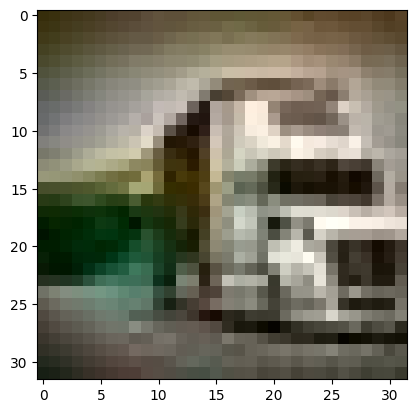

1/1 [==============================] - 0s 42ms/step
[[1. 0.]]


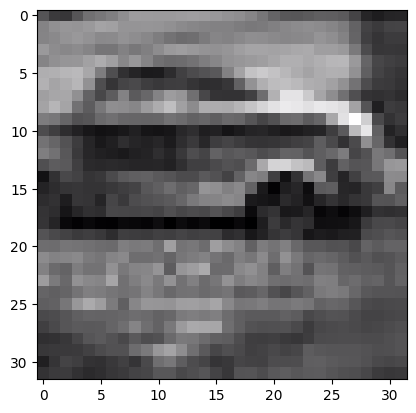

1/1 [==============================] - 0s 60ms/step
[[1. 0.]]


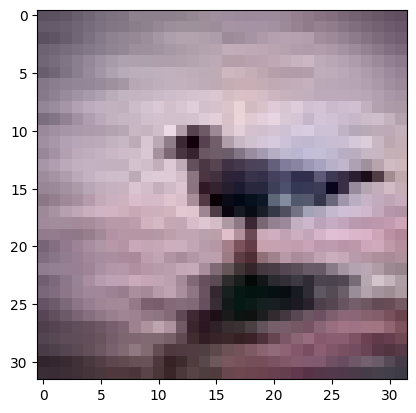

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


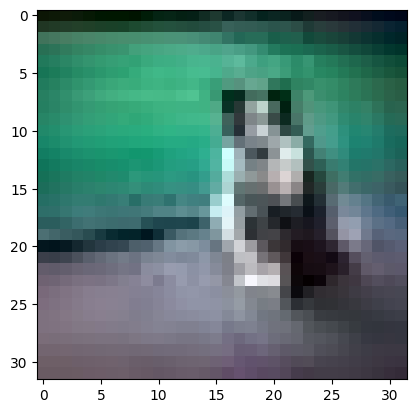

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


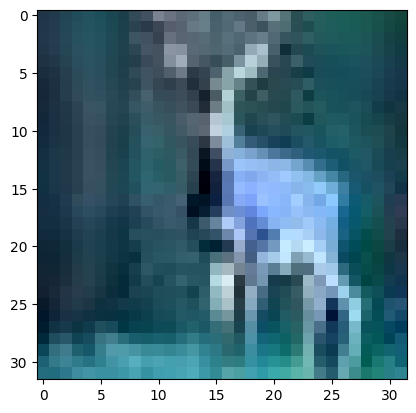

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


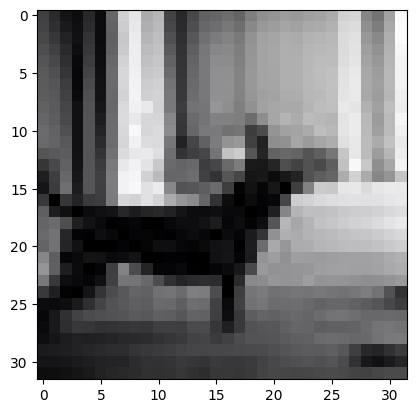

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


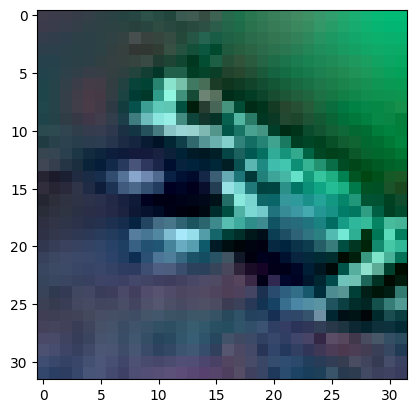

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]


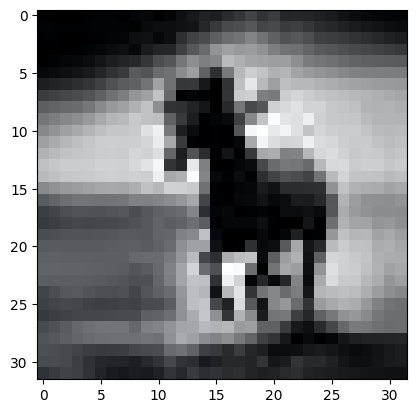

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


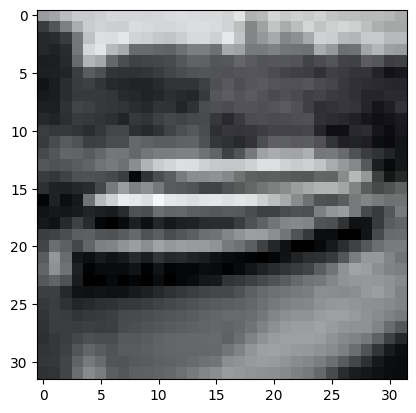

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


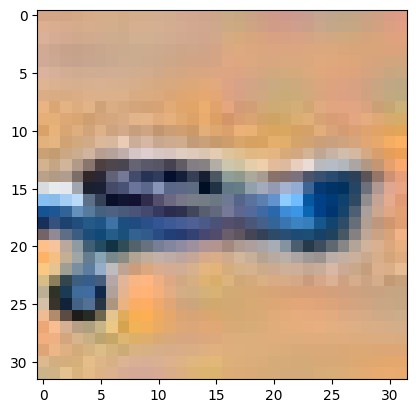

In [30]:
for i in range(10):
    image = cv2.imread(fake_test_images_path[i])
    test_image = tf.keras.utils.load_img(fake_test_images_path[i], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[i]}")


1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


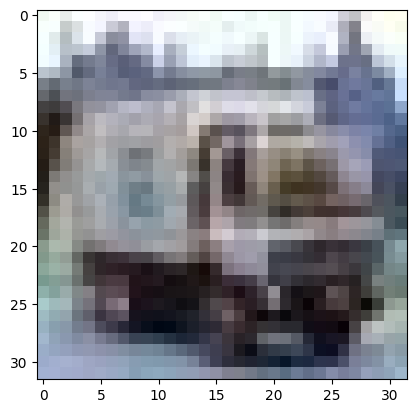

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


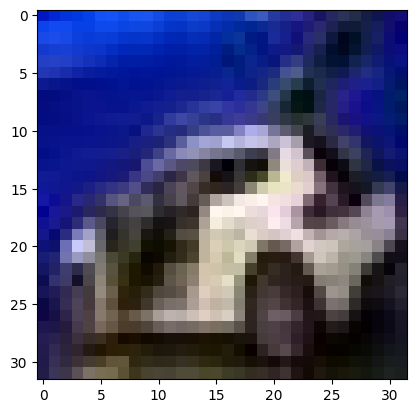

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


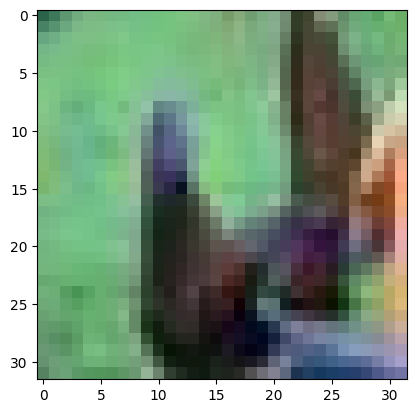

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]


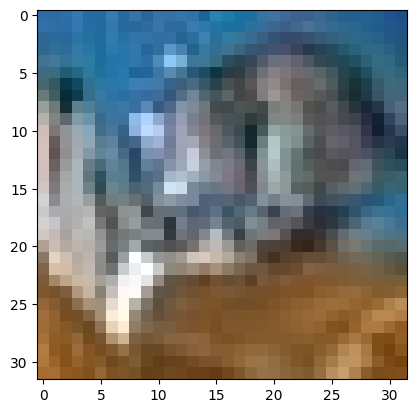

1/1 [==============================] - 0s 38ms/step
[[1.0000000e+00 2.1915458e-37]]


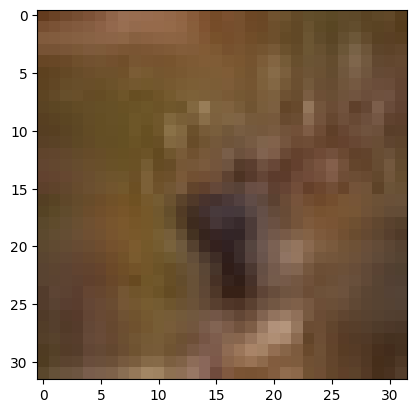

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


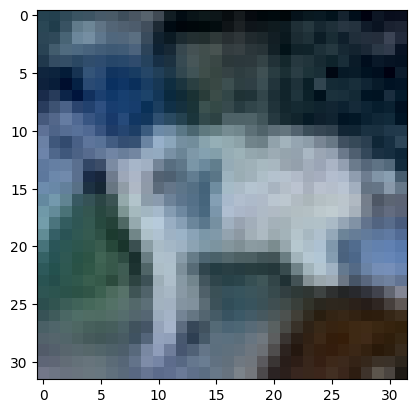

1/1 [==============================] - 0s 35ms/step
[[1. 0.]]


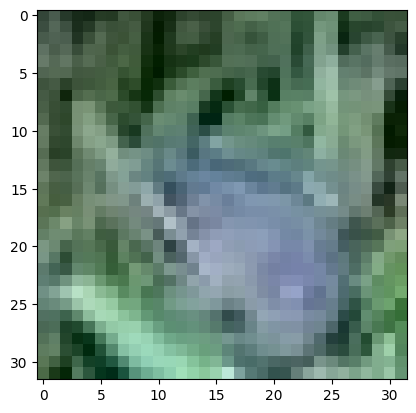

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


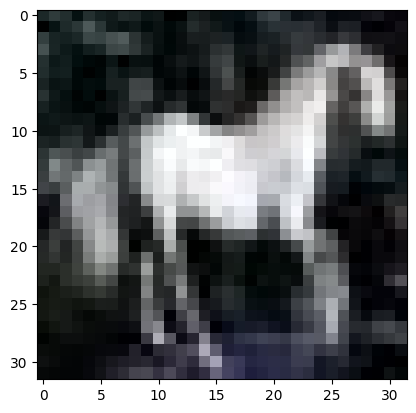

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]


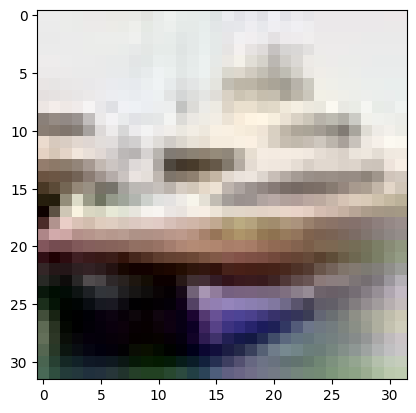

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]


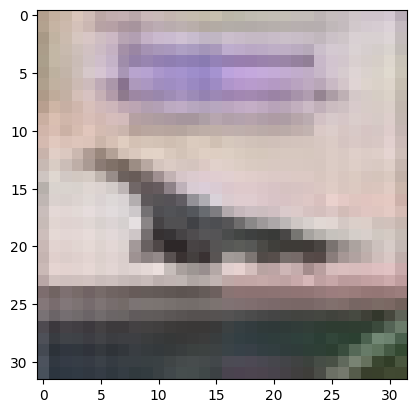

In [31]:
for j in range(10):
    image = cv2.imread(real_test_images_path[j])
    test_image = tf.keras.utils.load_img(real_test_images_path[j], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        plt.imshow(image)
        plt.show()
    else:
        print(f"Error loading image {images_path[j]}")